SAMPLE DATA

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
X = np.random.rand(500, 4)
y = np.random.rand(500, 3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 4), (100, 4), (400, 3), (100, 3))

STEP 1: Dataset & Dataloader

Dataloader digunakan untuk menghasilkan minibatch

In [3]:
import torch
from torch.utils.data import DataLoader, TensorDataset

In [4]:
#Data yang akan di proses harus diubah ke dalam bentuk Tensor bukan dengan numpy

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [5]:
X_train

tensor([[0.5606, 0.3730, 0.9128, 0.9704],
        [0.7741, 0.1693, 0.7157, 0.0672],
        [0.7639, 0.5456, 0.2491, 0.3214],
        ...,
        [0.3513, 0.0861, 0.8725, 0.4994],
        [0.1703, 0.7638, 0.5494, 0.6033],
        [0.8861, 0.3780, 0.2652, 0.0916]])

In [6]:
#Membuat Dataset

train_set = TensorDataset(X_train, y_train)
trainloader = DataLoader(train_set, batch_size=32, shuffle=True) 

test_set = TensorDataset(X_test, y_test)
testloader = DataLoader(test_set, batch_size=32) 

In [7]:
train_set.tensors

(tensor([[0.5606, 0.3730, 0.9128, 0.9704],
         [0.7741, 0.1693, 0.7157, 0.0672],
         [0.7639, 0.5456, 0.2491, 0.3214],
         ...,
         [0.3513, 0.0861, 0.8725, 0.4994],
         [0.1703, 0.7638, 0.5494, 0.6033],
         [0.8861, 0.3780, 0.2652, 0.0916]]), tensor([[0.1868, 0.6631, 0.6231],
         [0.7223, 0.6451, 0.4690],
         [0.6484, 0.4826, 0.9849],
         ...,
         [0.6465, 0.7921, 0.4174],
         [0.0447, 0.5301, 0.7084],
         [0.8715, 0.8084, 0.3419]]))

In [8]:
 #Perulangan data
 iterator = iter(trainloader)

In [9]:
iterator.next()

[tensor([[0.2604, 0.2921, 0.9938, 0.4849],
         [0.9290, 0.1238, 0.1037, 0.9681],
         [0.8861, 0.3780, 0.2652, 0.0916],
         [0.9800, 0.6393, 0.7712, 0.4340],
         [0.6167, 0.8891, 0.5470, 0.1847],
         [0.8559, 0.0537, 0.8242, 0.6896],
         [0.8801, 0.2993, 0.8221, 0.0567],
         [0.3127, 0.9691, 0.9134, 0.8814],
         [0.5973, 0.2864, 0.6396, 0.8009],
         [0.9070, 0.0144, 0.8463, 0.1696],
         [0.9890, 0.7531, 0.7069, 0.4173],
         [0.2867, 0.2291, 0.8760, 0.9930],
         [0.9521, 0.8802, 0.0169, 0.3660],
         [0.4670, 0.7395, 0.4013, 0.1945],
         [0.9665, 0.8938, 0.9160, 0.7607],
         [0.4715, 0.5628, 0.1512, 0.2056],
         [0.1486, 0.6029, 0.3506, 0.1288],
         [0.1045, 0.5468, 0.0778, 0.0518],
         [0.6823, 0.6904, 0.8886, 0.0827],
         [0.7741, 0.1693, 0.7157, 0.0672],
         [0.0206, 0.6883, 0.0436, 0.8251],
         [0.5236, 0.8236, 0.1103, 0.5479],
         [0.6639, 0.8350, 0.0482, 0.6883],
         [0

2. BANGUN ARSITEKTUR


In [10]:
from torch import nn

In [11]:
nn.Sequential(
    nn.Linear(4, 3),
    nn.ReLU(),
    nn.Linear(3, 4),
    nn.ReLU(),
    nn.Linear(4, 3),
    nn.Sigmoid()
)

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
  (5): Sigmoid()
)

3. Training Preparation

In [12]:
#Model

nn.Sequential(
    nn.Linear(4, 3),
    nn.ReLU(),
    nn.Linear(3, 4),
    nn.ReLU(),
    nn.Linear(4, 3),
    nn.Sigmoid()
)

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
  (5): Sigmoid()
)

In [18]:
model = nn.Sequential(
    nn.Linear(4, 3),
    nn.ReLU(),
    nn.Linear(3, 4),
    nn.ReLU(),
    nn.Linear(4, 3),
    nn.Sigmoid()
)

In [13]:
#Criterion - sebuah fungsi yang digunakan untuk menghitung LOSS

criterion = nn.MSELoss() #model diakhiri linear -> untuk regresi
criterion = nn.NLLLoss() #model diakhiri logsoftmax -> multiclass clf
criterion = nn.BCELoss() #model diakhiri sigmoid -> binnary clf, multilable 

In [15]:
#Optimizer

from torch import optim

In [19]:
optimizer = optim.AdamW(model.parameters(), lr=0.001)

4. TRAINING LOOP

In [22]:
epochs = 500
for i in range(epochs):
  model.train()
  for feature, target in trainloader:
    output = model(feature) #FeedForward
    loss = criterion(output, target) #hitungLoss
    loss.backward() #backprop

    optimizer.step() #update weight
    optimizer.zero_grad()
  
  print(f"\rEpoch: {i+1}/{epochs}", end="")

Epoch: 500/500

In [23]:
epochs = 500
train_cost = []
for i in range(epochs):
  model.train()
  cost = 0
  for feature, target in trainloader:
    output = model(feature) #FeedForward
    loss = criterion(output, target) #hitungLoss
    loss.backward() #backprop

    optimizer.step() #update weight
    optimizer.zero_grad()
  
    cost += loss.item() * feature.shape[0]
  train_cost.append(cost / len(train_set))

  print(f"\rEpoch: {i+1:4}/{epochs:4} | train_cost: {train_cost[-1]:4f}", end="")

Epoch:  500/ 500 | train_cost: 0.688545

In [24]:
import matplotlib.pyplot as plt 

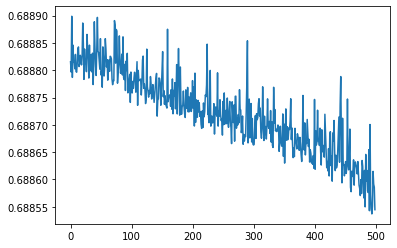

In [25]:
plt.plot(train_cost)